# DataSet - Cardio

Pessoa terá ou não problemas cardiácos.


### Importando as Bibliotecas

In [1]:
#Bibilotecas básicas 
import pandas as pd
import numpy as np

#Bibliotecas de DataViz
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from bokeh.plotting import figure
from bokeh.io import show

#balaceamento de dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss 

#tratamento de categóricas
#from feature_engine import categorical_encoders as ce

#pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

#Modelagem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#estatística e métricas
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

#otimização de modelos
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


# PCA - DataCompression
from sklearn.decomposition import PCA

#Cluesterização
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN

#Pipeline
from sklearn.pipeline import make_pipeline

#esembles
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import lightgbm as lgb 
#import xgboost as xgb 

#biblioteca de explicação
#import shap

## ETL

In [2]:
df = pd.read_csv('cardio_train.csv', sep =';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.shape

(70000, 13)

In [4]:
def normal(df, col, threshold=0.05):
    try:
        zscore, p_value = stats.normaltest(df[col])
        if p_value < threshold:
            result = 'not_normal'
        else:
            result = 'normal'
    except:
        zscore = p_value = np.nan
        result = 'not_applicable'
    return result

def outliers_count_IQR(df, col):
    try:
        if len(df[col].unique())>2: # if para eliminar features binárias
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr_range = q3 - q1
            lower = q1 - 1.5*iqr_range
            upper = q3 + 1.5*iqr_range
            out_low = df[df[col] < lower].count()[0]
            out_up = df[df[col] > upper].count()[0]
            outliers = out_low + out_up
            outliers_perc = round(outliers / df.shape[0],2)
        else:
            outliers = np.nan
            outliers_perc = np.nan
    except:
        outliers = np.nan
        outliers_perc = np.nan
    return outliers, outliers_perc


#o que interessa
def ETLtool_LucioEdu(df):
    df= df.rename(columns=str.lower)

    eda_df = {}
    eda_df['Amount_NaN'] = df.isnull().sum()
    eda_df['%_NaN'] = df.isnull().mean().round(2)
    eda_df['DType'] = df.dtypes
    eda_df['Amount_Data'] = df.count()
    
    colunas = df.columns.tolist()
      
    eda_df['Amount_Unique'] = pd.Series(map(lambda x: len(df[x].unique().tolist()), colunas), index=colunas)

    eda_df['Min'] = df.min()
    eda_df['Max'] = df.max()
    eda_df['Mean'] = df.mean().round(3)
    eda_df['STD'] = df.std().round(3)
    
    eda_df['Normality'] = pd.Series(map(lambda x: normal(df, x), colunas), index=colunas)
    eda_df['Amount_Outliers'] = pd.Series(map(lambda x: outliers_count_IQR(df, x)[0], colunas), index=colunas)
    eda_df['%_Outliers'] = pd.Series(map(lambda x: outliers_count_IQR(df, x)[1], colunas), index=colunas)
    df = pd.DataFrame(eda_df)
    return df.loc[colunas,:]


def unique_values(df):

    for cols in df.columns:
        if (len(df[cols].unique()) < 5) and (df[cols].dtypes == 'object'):                
            print(cols, ' = ', list(df[cols].unique()))
    return  None

In [5]:
ETLtool_LucioEdu(df)

,Amount_NaN,%_NaN,DType,Amount_Data,Amount_Unique,Min,Max,Mean,STD,Normality,Amount_Outliers,%_Outliers
id,0,0.0,int64,70000,70000,0.0,99999.0,49972.420,28851.302,not_applicable,0.0,0.00
age,0,0.0,int64,70000,8076,10798.0,23713.0,19468.866,2467.252,not_applicable,4.0,0.00
gender,0,0.0,int64,70000,2,1.0,2.0,1.350,0.477,not_applicable,NaN,NaN
height,0,0.0,int64,70000,109,55.0,250.0,164.359,8.210,not_applicable,519.0,0.01
weight,0,0.0,float64,70000,287,10.0,200.0,74.206,14.396,not_applicable,1819.0,0.03
ap_hi,0,0.0,int64,70000,153,-150.0,16020.0,128.817,154.011,not_applicable,1435.0,0.02
ap_lo,0,0.0,int64,70000,157,-70.0,11000.0,96.630,188.473,not_applicable,4632.0,0.07
cholesterol,0,0.0,int64,70000,3,1.0,3.0,1.367,0.680,not_applicable,0.0,0.00
gluc,0,0.0,int64,70000,3,1.0,3.0,1.226,0.572,not_applicable,10521.0,0.15
smoke,0,0.0,int64,70000,2,0.0,1.0,0.088,0.283,not_applicable,NaN,NaN


0    35021
1    34979
Name: cardio, dtype: int64


([<matplotlib.patches.Wedge at 0x22af79916d0>,
 [Text(-0.0010366914769016045, 1.0999995114866106, '0'),
  Text(0.0010366914769012255, -1.0999995114866106, '1')],
 [Text(-0.000565468078309966, 0.5999997335381512, '50.0%'),
  Text(0.0005654680783097592, -0.5999997335381512, '50.0%')])

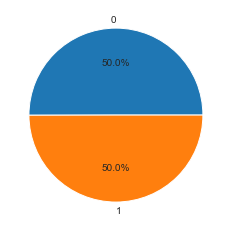

In [6]:
#balanceamento do target
print(df['cardio'].value_counts())

freq = df['cardio'].value_counts()
sns.set_style('white')
plt.figure()
plt.pie(freq.values, labels=freq.index, autopct='%1.1f%%' )

In [7]:
#primeiras percepções dos dados

## sem NaNs
## colunas age em dia.. transformar para anos?
## excluir id
## dados balanceados
## todos numéricos
## mtas colunas com 2 ou 3 valores numéricos únicos, tratar como categórico? (usar o dummie)

In [8]:
df['smoke'] = df['smoke'].replace(0, 'Não')
df['gender'] = df['gender'].replace(1, 'Feminino')
df['alco'] = df['alco'].replace(0, 'Não')
df['active'] = df['active'].replace(0, 'Não')
df['smoke'] = df['smoke'].replace(1, 'Sim')
df['gender'] = df['gender'].replace(2, 'Masculino')
df['alco'] = df['alco'].replace(1, 'Sim')
df['active'] = df['active'].replace(1, 'Sim')
df['gluc'] = df['gluc'].replace(1, 'Baixo')
df['gluc'] = df['gluc'].replace(2, 'Médio')
df['gluc'] = df['gluc'].replace(3, 'Alto')
df['cholesterol'] = df['cholesterol'].replace(1, 'Baixo')
df['cholesterol'] = df['cholesterol'].replace(2, 'Médio')
df['cholesterol'] = df['cholesterol'].replace(3, 'Alto')

In [9]:
del df['id']

### EDA - Exploratory Data Analysis

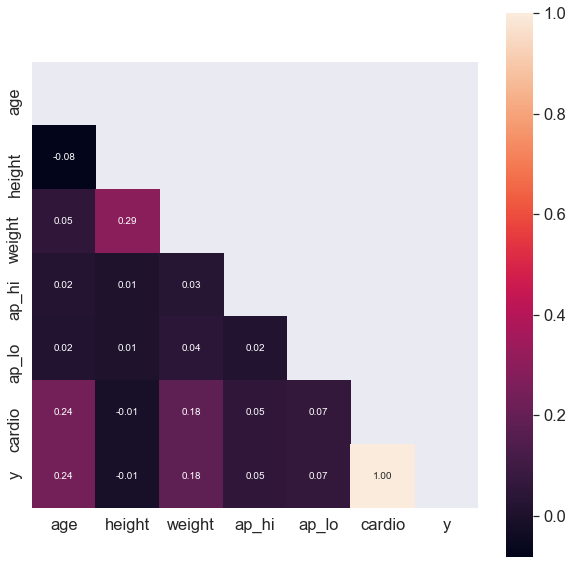

In [10]:
# Plotando um mapa de calor das correlações com todas as variáveis

# criando uma coluna booleana para a variável target
df['y'] = df['cardio'] == 1

corrmat = df.corr()
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(10, 10))
mask = np.triu(np.ones_like(corrmat, dtype=bool))
hm = sns.heatmap(corrmat, 
                 mask = mask,
                 cbar=True, # formatando a barra lateral de cores para o heatmap
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=corrmat.columns, 
                 xticklabels=corrmat.columns)

In [11]:
df.corr().round(2)['y'].sort_values(ascending=False)

cardio    1.00
y         1.00
age       0.24
weight    0.18
ap_lo     0.07
ap_hi     0.05
height   -0.01
Name: y, dtype: float64

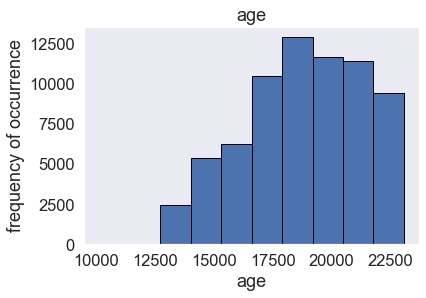

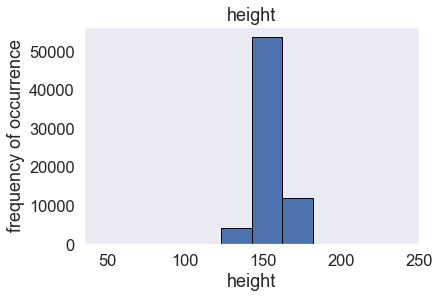

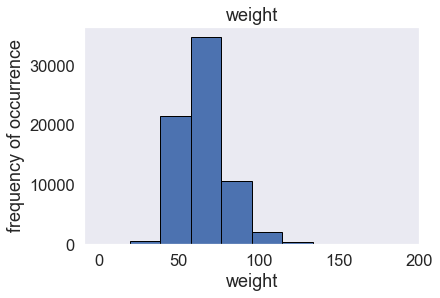

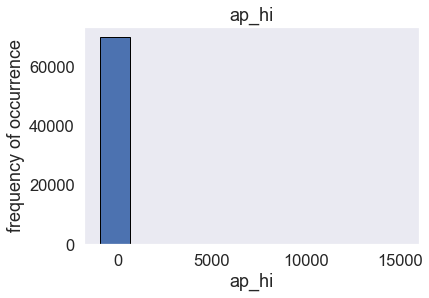

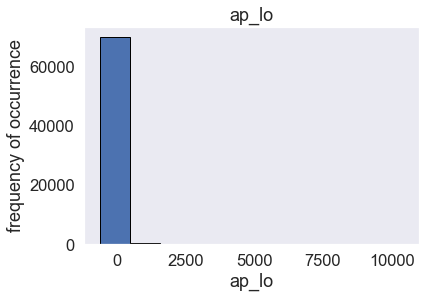

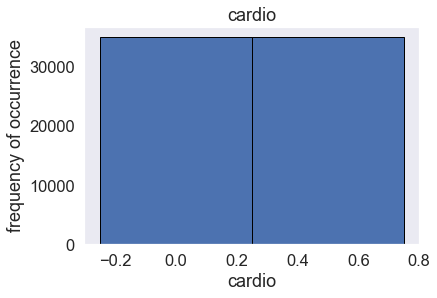

In [12]:
# Histogram por feature: features numéricas
for column in df.columns[0:]:
    if (df[column].dtypes == 'int64') or (df[column].dtypes == 'float64') :
        freq = len(df[column].value_counts())
        if freq >= 10:
            freq = 10
        df.hist(column=column,bins=freq,grid=False,edgecolor='black', align='left')
        plt.xlabel(column)
        plt.ylabel('frequency of occurrence')

In [13]:
#df.hist(column=df['ap_lo'],bins=freq,grid=False,edgecolor='black', align='left')

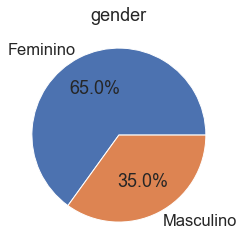

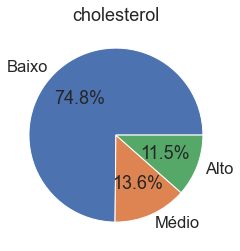

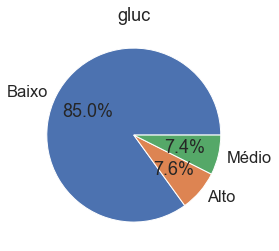

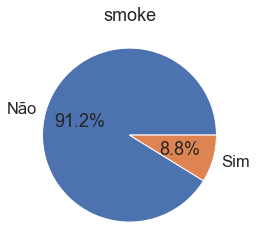

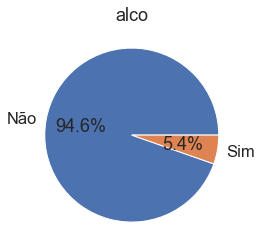

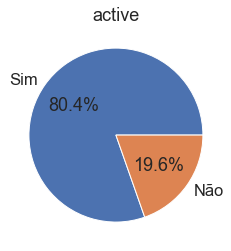

In [14]:
# Pie charts por feature: para features categóricas
for column in df.columns[0:]:
    if df[column].dtypes == 'object':
        freq = df[column].value_counts()
        sns.set_style('white')
        plt.figure()
        plt.pie(freq.values, labels=freq.index, autopct='%1.1f%%' )
        plt.title(column)

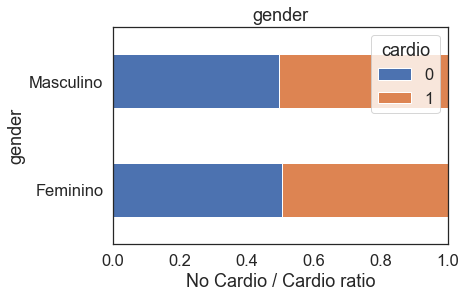

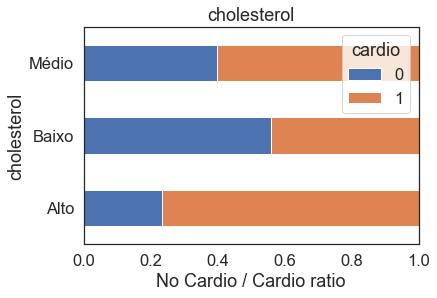

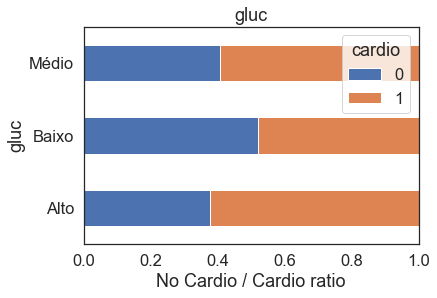

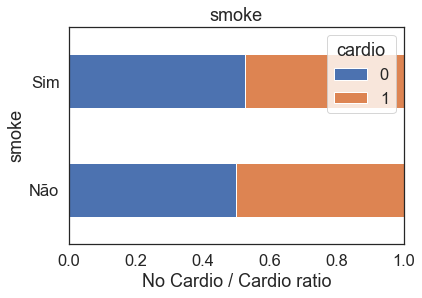

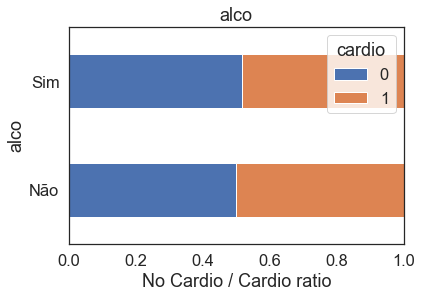

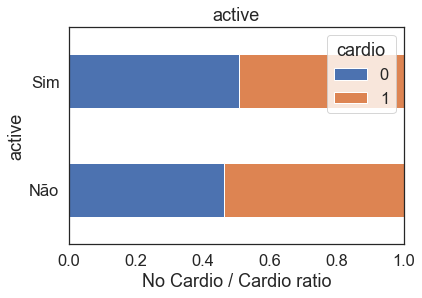

In [15]:
# Stacked plot para features categóricas
for column in df.columns[1:]:
    if df[column].dtypes == 'object':
        att_group = df.groupby([column,'cardio']).size().unstack()
        att_group.apply(lambda x:x/x.sum(),axis=1).plot(kind='barh', stacked=True)
        plt.xlabel('No Cardio / Cardio ratio')
        plt.xlim([0, 1])
        plt.title(column)

In [16]:
df.groupby('gender')['weight'].mean().sort_values(ascending = False) 

gender
Masculino    77.257307
Feminino     72.565605
Name: weight, dtype: float64

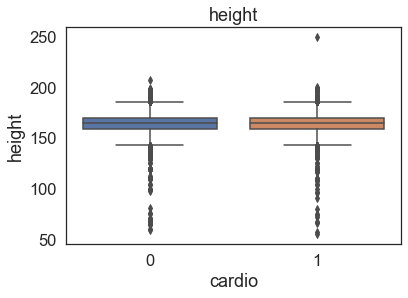

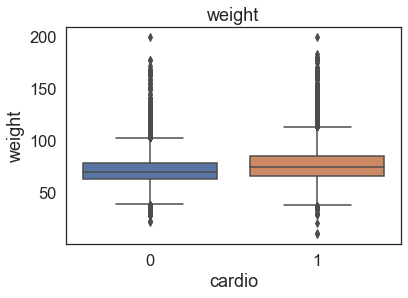

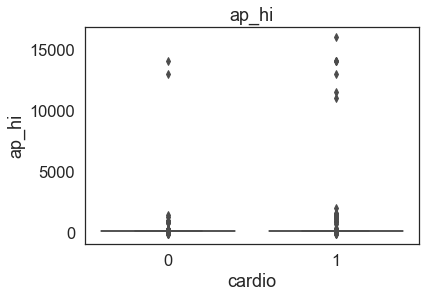

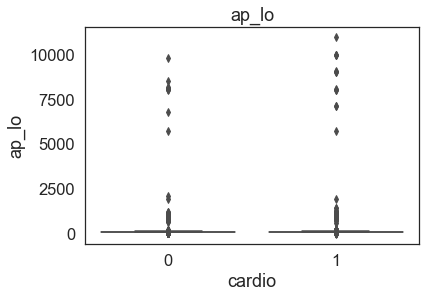

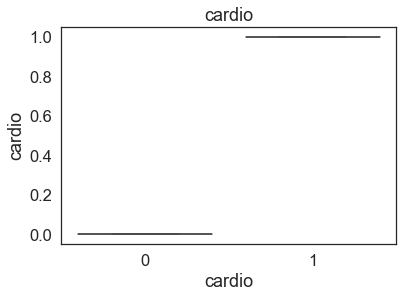

In [17]:
# Boxplot para features numéricas
for column in df.columns[1:]:
    if (df[column].dtypes == 'int64') or (df[column].dtypes == 'float64'):
        plt.figure()
        sns.boxplot(y=column, x='cardio', data= df, palette="deep")
        plt.title(column)

In [18]:
#correlação baixa das features com o target
#50% dos dados tem problemas cardáquicos, mas nenhuma feature realmente deixa claro que tem uma correlação maior com ter ou não ter problemas
##cardiácos, o que leva a pensar que um variedade grande de combinações que levam uma pessoa a ter problemas cardiacos
## talvez tenhamos problemas na acurácia e nos verdadeiros positivos

## metrica de interesse, não podemos predizer que a pessoa não tera problemas cardiácos, mas na vdd ela tem (minimizar falso negativo)
## metrica de interesse, acertar quem tem problema cardiaco e realmente tem

## Criando um modelo de classificação

### Tratando Colunas Categóricas 

#### Dummies (até 5 valores únicos)

In [19]:
dummies_list = ['gender', 'smoke','alco','active','gluc','cholesterol']
#dummies_list2 = ['gender','gluc','cholesterol']

df = pd.get_dummies(df, columns = dummies_list)

### Fazer o split dos dados

In [20]:
#separar o alvo
y = df['cardio']
del df['cardio']
del df['y']

x_treino, x_teste, y_treino, y_teste = train_test_split(df, y, test_size=0.20)

### Pré-processamento - normalização dos dados

In [21]:
#vou usar o RObustscaler a principio e dps testar outros
## usar o robust pq o gluc tem mtos outlers

#scaler = preprocessing.RobustScaler().fit(x_treino)
#scaler = preprocessing.MinMaxScaler().fit(x_treino)
scaler = preprocessing.StandardScaler().fit(x_treino)

x_treino_norm = scaler.transform(x_treino)
x_teste_norm = scaler.transform(x_teste)



KNeighborsClassifier
****Results****
Accuracy: 0.653
F-score= 0.6457117852975496
Precision: 0.6615361625821877
Recall: 0.6306267806267807
Matriz Confusão
 [[4715 2265]
 [2593 4427]]
Verdadeiro Positivo (TP): previmos corretamente que o paciente terá problema cardíaco = 4427
Verdadeiro Negativo (TN): previmos corretamente que o paciente não terá problema cardíaco= 4715
Falso Positivo (FP): previmos que o paciente teria problema cardíaco, mas não terá = 2265
Falso Negativo (FN): previmos que o paciente não teria problema cardíaco, mas terá = 2593
GaussianNB
****Results****
Accuracy: 0.6054285714285714
F-score= 0.4954329557910121
Precision: 0.6904276985743381
Recall: 0.38632478632478634
Matriz Confusão
 [[5764 1216]
 [4308 2712]]
Verdadeiro Positivo (TP): previmos corretamente que o paciente terá problema cardíaco = 2712
Verdadeiro Negativo (TN): previmos corretamente que o paciente não terá problema cardíaco= 5764
Falso Positivo (FP): previmos que o paciente teria problema cardíaco, mas 

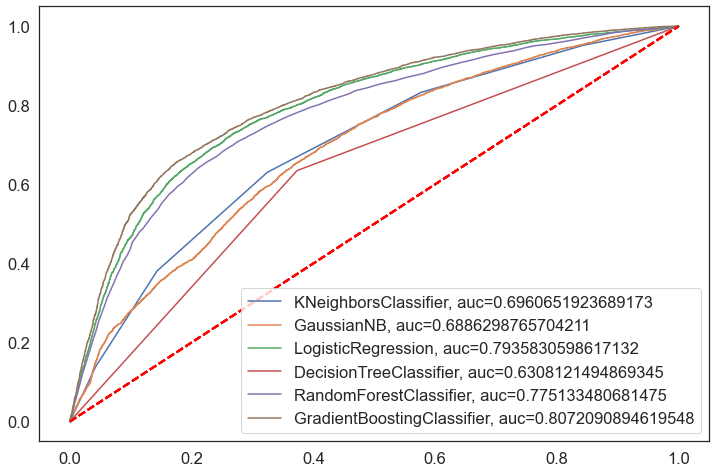

In [22]:
%%time

classifiers = [
    KNeighborsClassifier(),
    GaussianNB(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()]

plt.figure(figsize=(12,8))

for clf in classifiers:
    # instanciando o modelo
    clf.fit(x_treino_norm, y_treino)
    # armazenando o nome do modelo na variável name
    name = clf.__class__.__name__
    # imprimindo o nome do modelo
    print("="*30)
    print(name)
    # imprimindo os resultados do modelo
    print('****Results****')
    y_pred_test = clf.predict(x_teste_norm)
    y_pred_train = clf.predict(x_treino_norm)
    
    print("Accuracy:", metrics.accuracy_score(y_teste, y_pred_test))
    print('F-score=', f1_score(y_teste, y_pred_test))
    print("Precision:", metrics.precision_score(y_teste, y_pred_test))
    print("Recall:", metrics.recall_score(y_teste, y_pred_test))
    print('Matriz Confusão\n',metrics.confusion_matrix(y_teste, y_pred_test))
    tn, fp, fn, tp = confusion_matrix(y_teste, y_pred_test).ravel()
    print('Verdadeiro Positivo (TP): previmos corretamente que o paciente terá problema cardíaco =',tp)
    print('Verdadeiro Negativo (TN): previmos corretamente que o paciente não terá problema cardíaco=',tn)
    print('Falso Positivo (FP): previmos que o paciente teria problema cardíaco, mas não terá =',fp)
    print('Falso Negativo (FN): previmos que o paciente não teria problema cardíaco, mas terá =',fn)
    
    
    # imprimindo as métricas para os dados de treino
    #print('\n-----Dados de Treino-----')
    #print('MSE - treino', mean_squared_error(y_treino, y_pred_train))
    #print('MAE - treino', median_absolute_error(y_treino, y_pred_train))
    #print('R2 - treino', r2_score(y_treino, y_pred_train))
    
    # imprimindo as métricas para os dados de teste
    #print('\n-----Dados de Teste-----')
    #print('MSE - test', mean_squared_error(y_teste, y_pred_test))
    #print('MAE - test', median_absolute_error(y_teste, y_pred_test))
    #print('R2 - test', r2_score(y_teste, y_pred_test))
    
    # plotando a curva ROC
    y_pred_proba = clf.predict_proba(x_teste_norm)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_teste,  y_pred_proba)
    auc = metrics.roc_auc_score(y_teste, y_pred_proba)
    plt.plot(fpr,tpr,label=name+", auc="+str(auc))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.legend(loc=4)

In [23]:
reg = LogisticRegression().fit(x_treino_norm, y_treino)
reg.score(x_treino_norm, y_treino)

0.7218214285714286

In [24]:
x_treino_df = pd.DataFrame(x_treino, columns = df.columns.tolist())

importance_df = pd.DataFrame()
importance_df['colunas'] = x_treino_df.columns.tolist()
importance_df['importância'] = reg.coef_.tolist()[0]
importance_df.sort_values('importância',ascending=False).set_index('colunas')

,importância
colunas,
ap_hi,6.596885
age,0.358883
cholesterol_Alto,0.232346
weight,0.207155
ap_lo,0.045689
active_Não,0.038012
gluc_Baixo,0.034580
gluc_Médio,0.026302
smoke_Não,0.019928


## Validação da establidade do modelo e Otimização dos parâmetros

Fareamos a validação e otimização em cima do algorítimo escolhido

In [25]:
y = y.values
x = df.values

# vamos usar o cross-validation (validação cruzada)

kf = KFold(n_splits = 5)


# criando uma lista com o Grid Searrch dos parâmetros
parameters = {
    'max_iter': [50, 100, 150]
    }

#criar o modelo base
modelo = LogisticRegression()

# definir a busca pelo melhor modelo
clf = GridSearchCV(modelo,parameters)


lista_metricas_treino = []
lista_acuracia_teste = []
lista_mehores_parametros = []


for train_index, test_index in kf.split(x):
    #print("TRAIN:", train_index, "TEST:", test_index)
    
    #separação entre treino e teste (validação cruzada)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # normalização dos dados
    scaler = preprocessing.StandardScaler().fit(X_train)
    
    #aplicar o scaler
    x_train = scaler.transform(X_train)
    x_test = scaler.transform(X_test)
    
    #aplicação da busca cruzada
    clf.fit(x_train, y_train)
    
    # estimativa do treino
    y_pred_train = clf.predict(x_train)
    
    # estimativa do teste
    y_pred_test = clf.predict(x_test)
    
    # salvar a acurácia do melhor modelo para treino e teste
    lista_metricas_treino.append(metrics.accuracy_score(y_train, y_pred_train))
    lista_acuracia_teste.append(metrics.accuracy_score(y_test, y_pred_test))
    lista_mehores_parametros.append(clf.best_params_)
    
    

In [26]:
print(lista_mehores_parametros)

[{'max_iter': 50}, {'max_iter': 50}, {'max_iter': 50}, {'max_iter': 50}, {'max_iter': 50}]


In [27]:
print(lista_acuracia_teste)

[0.716, 0.7235714285714285, 0.7177142857142857, 0.7288571428571429, 0.717]


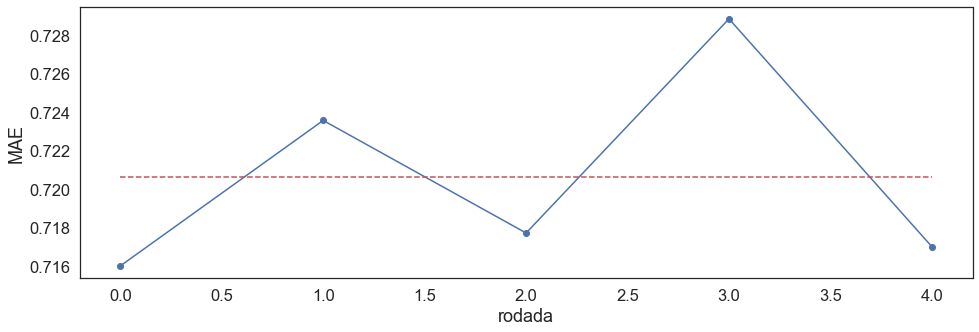

In [28]:
fig = plt.figure(figsize=(16, 5))
plt.plot(lista_acuracia_teste, 'o-')
plt.plot(np.repeat(np.array(lista_acuracia_teste).mean(), len(lista_acuracia_teste)), 'r--')
plt.xlabel('rodada')
plt.ylabel('MAE');

In [29]:
np.std(lista_acuracia_teste)

0.004887802394215423